In [83]:
##Khai báo các thư viện
from __future__ import print_function
import time
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, merge, BatchNormalization,GRU
from keras.datasets import imdb

import os
from keras.preprocessing.text import Tokenizer


In [84]:
X_train_pos = []

X_train_neg = []

# combine sentiment by stanford
import pandas as pd
import ast

df = pd.read_csv('sentiment_tweet.csv', quotechar='"')
del df['Unnamed: 0']
del df['Unnamed: 0.1']

for index, row in df.iterrows():
    sentiment = ast.literal_eval(row['sentiment'])['sentiment']
    if sentiment != None:
        if sentiment['basic'] == 'Bullish':
            X_train_pos.append(row)
        elif sentiment['basic'] == 'Bearish':
            X_train_neg.append(row)


In [85]:
print(len(X_train_pos))
print(len(X_train_neg))

63777
25351


In [86]:
X_train = []
y_train = []

X_test = []
y_test = []

#train
#positive
X_train.extend(X_train_pos[0:51021])
y_train.extend([1 for _ in range(51021)])

#negative
X_train.extend(X_train_neg[0:20280])
y_train.extend([0 for _ in range(20280)])
print(len(X_train))
print(len(y_train))
#test
X_test.extend(X_train_pos[51022:63777])
y_test.extend([1 for _ in range(12755)])

X_test.extend(X_train_pos[20280:25351])
y_test.extend([0 for _ in range(5071)])

Xtrain = pd.DataFrame(X_train)
Xtrain.to_csv('./posnegtrain.csv')


71301
71301


In [55]:
#print(X_train[0:5])
#print(Xtrain['text'])
## Gán nhãn cho dữ liệu train

#path = 'C:/KHOALUAN/DATA/individual_stocs_reuter/google/train/pos/'
#X_train.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])

#y_train.extend([1 for _ in range(1384)])

#path = 'C:/KHOALUAN/DATA/individual_stocs_reuter/google/train/neg/'
#X_train.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])

#y_train.extend([0 for _ in range(868)])


In [56]:
##Gán nhãn cho dữ liệu test
#X_test = []
#y_test = []

#path = 'C:/KHOALUAN/DATA/individual_stocs_reuter/google/test/pos/'
#X_test.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])
#y_test.extend([1 for _ in range(691)])

#path = 'C:/KHOALUAN/DATA/individual_stocs_reuter/google/test/neg/'
#X_test.extend([open(path + f).read() for f in os.listdir(path) if f.endswith('.txt')])
#y_test.extend([0 for _ in range(433)])


In [87]:
## Khai báo tham số đặc trưng và chiều dài câu
max_features =2000
max_len = 800  # cut texts after this number of words (among top max_features most common words)

In [88]:
## Xử lý remove stop words cho dữ liệu train
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

X_train_rm= []
stop_words=set(stopwords.words("english"))

for index, row in Xtrain.iterrows():
    nrow = row['text']
    if type(nrow) != str:
        print(nrow, index)
        continue
        #X_train_rm.append(remove_sw)
    else:
        words=word_tokenize(nrow)
        remove_sw= [w for w in words if not w in stop_words]
        X_train_rm.append(remove_sw),
sentence_train=[]
for i in range(len(X_train_rm)):
    s = ""
    for j in range(len(X_train_rm[i])):
        s+=X_train_rm[i][j]+" "
    sentence_train.append(s),


nan 61513


In [90]:
print(X_train_rm[0:5])
#print(sentence_train[0:5])
print(len(sentence_train))

[['aapl', 'ba', 'amzn', 'cat', 'nflx', 'lmt', 'noc', 'hold', 'hold', 'hold', 'stop', 'madness'], ['aapl', 'open'], ['aapl', 'article', 'said', 'could', 'go', 'six', 'dollars', 'cares', 'much', 'already', 'fallen', 'risk', 'reward', 'good'], ['spy', 'bears', 'acting', 'like', 'bulls', 'mrkt', 'flushing', 'bulls', 'thought', 'could', 'go', 'get', 'point', 'aapl', 'amzn', 'baba', 'jd', 'nflx'], ['spy', 'obama', 'economy', 'good', 'fed', 'raise', 'rate', 'political', 'bankers', 'trump', 'aapl', 'amzn', 'googl', 'fb', 'nflx']]
71300


In [91]:
## Xử lý remove stop words cho dữ liệu test
X_test_rm= []
stop_words=set(stopwords.words("english"))
Xtest = pd.DataFrame(X_test)
for index, row in Xtest.iterrows():
    nrow = row['text']
    if type(nrow) != str:
        continue
    else:
        words=word_tokenize(nrow)
        remove_sw= [w for w in words if not w in stop_words]
        X_test_rm.append(remove_sw),
sentence_test=[] 
for i in range(len(X_test_rm)):
    s = ""
    for j in range(len(X_test_rm[i])):
        s+=X_test_rm[i][j]+" "
    sentence_test.append(s),


In [92]:
print("Number of words: ")
print(len(np.unique(np.hstack(Xtrain['text']))))
X_train_text = Xtrain['text']
X_train_text = X_train_text.values.tolist()
#print(type(X_train_text))

Number of words: 
65911


In [93]:
from matplotlib import pyplot
# Summarize review length
print("Review length: ")
result = map(len, X_train_text)
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

Review length: 


TypeError: unsupported operand type(s) for /: 'map' and 'int'

In [94]:
# Xứ lý tách từ 
imdbTokenizer = Tokenizer(num_words=max_features)

imdbTokenizer.fit_on_texts(sentence_train)
#for word, value in imdbTokenizer.word_index.items():
    #print(word),


In [95]:
#create int to word dictionary
intToWord = {}
for word, value in imdbTokenizer.word_index.items():
    intToWord[value] = word

#add a symbol for null placeholder
intToWord[0] = "!!!NA!!!"
    
print(intToWord[1])
print(intToWord[2])
print(intToWord[32])


aapl
amzn
long


In [96]:
#convert word strings to integer sequence lists
#print(X_train[0])
#print(imdbTokenizer.texts_to_sequences(X_train[:1]))
#for value in imdbTokenizer.texts_to_sequences(X_train[:1])[0]:
    #print(intToWord[value])
    
X_train = imdbTokenizer.texts_to_sequences(sentence_train)
print('X_train shape:', len(X_train))
X_test = imdbTokenizer.texts_to_sequences(sentence_test)
print(type(y_train))
del y_train[61513]

X_train shape: 71300
<class 'list'>


In [97]:
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print("Pad sequences (samples x time)")
X_train = sequence.pad_sequences(X_train, maxlen=max_len)
X_test = sequence.pad_sequences(X_test, maxlen=max_len)
print('X_train shape:', X_train.shape)
print('y_train shape:', len(y_train))
print('X_test shape:', X_test.shape)
y_train = np.array(y_train)
y_test = np.array(y_test)


71300 train sequences
17826 test sequences
Pad sequences (samples x time)
X_train shape: (71300, 800)
y_train shape: 71300
X_test shape: (17826, 800)


In [98]:
epochs = 10
embedding_neurons = 128
lstm_neurons = 64
batch_size =32


In [99]:
# Forward Pass LSTM Network

# this is the placeholder tensor for the input sequences
sequence = Input(shape=(max_len,), dtype='int32')
# this embedding layer will transform the sequences of integers
# into vectors of size embedding
# embedding layer converts dense int input to one-hot in real time to save memory
embedded = Embedding(max_features, embedding_neurons, input_length=max_len)(sequence)
# normalize embeddings by input/word in sentence
bnorm = BatchNormalization()(embedded)

# apply forwards LSTM layer size lstm_neurons
forwards = GRU(lstm_neurons, dropout_W=0.4, dropout_U=0.4)(bnorm)

# dropout 
after_dp = Dropout(0.5)(forwards)
output = Dense(1, activation='sigmoid')(after_dp)

model_fdir_atom = Model(inputs=sequence, outputs=output)
# review model structure
print(model_fdir_atom.summary())
print(len(y_train))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 800)               0         
_________________________________________________________________
embedding_4 (Embedding)      (None, 800, 128)          256000    
_________________________________________________________________
batch_normalization_4 (Batch (None, 800, 128)          512       
_________________________________________________________________
gru_4 (GRU)                  (None, 64)                37056     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 293,633.0
Trainable params: 293,377.0
Non-trainable params: 256.0
______________________________________________________________

Train...
Train on 71300 samples, validate on 17826 samples
Epoch 1/10
2681s - loss: 0.5118 - acc: 0.7565 - val_loss: 0.8128 - val_acc: 0.6957
Epoch 2/10
3029s - loss: 0.4673 - acc: 0.7817 - val_loss: 0.8018 - val_acc: 0.6886
Epoch 3/10
2841s - loss: 0.4567 - acc: 0.7876 - val_loss: 0.8041 - val_acc: 0.6840
Epoch 4/10
2617s - loss: 0.4493 - acc: 0.7916 - val_loss: 0.7855 - val_acc: 0.6612
Epoch 5/10
2896s - loss: 0.4457 - acc: 0.7932 - val_loss: 0.8079 - val_acc: 0.6760
Epoch 6/10
2906s - loss: 0.4425 - acc: 0.7951 - val_loss: 0.8118 - val_acc: 0.6845
Epoch 7/10
2826s - loss: 0.4394 - acc: 0.7977 - val_loss: 0.8206 - val_acc: 0.6738
Epoch 8/10
2737s - loss: 0.4372 - acc: 0.7987 - val_loss: 0.8369 - val_acc: 0.6795
Epoch 9/10
2807s - loss: nan - acc: 0.0685 - val_loss: nan - val_acc: 0.0000e+00
Epoch 10/10
2941s - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
avg sec per epoch: 2828.6630739450457
Accuracy: 0.00%
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


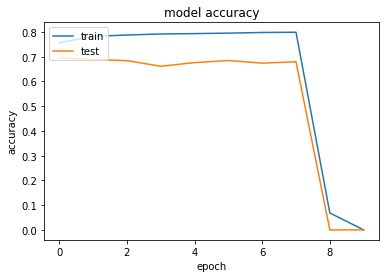

In [100]:
# Forward pass LSTM network
#'precision','recall', 'fmeasure'
# try using different optimizers and different optimizer configs
model_fdir_atom.compile('adam', 'binary_crossentropy', metrics=['accuracy'])
print('Train...')
start_time = time.time()

history_fdir_atom = model_fdir_atom.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=[X_test, y_test], 
                    verbose=2)

end_time = time.time()
average_time_per_epoch = (end_time - start_time) / epochs
print("avg sec per epoch:", average_time_per_epoch)

scores = model_fdir_atom.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib.pyplot as plt
print(history_fdir_atom.history.keys())
# summarize history for accuracy
plt.plot(history_fdir_atom.history['acc'])
plt.plot(history_fdir_atom.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



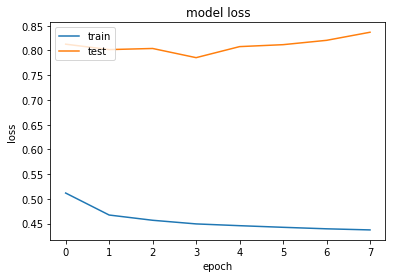

In [101]:
# summarize history for loss
plt.plot(history_fdir_atom.history['loss'])
plt.plot(history_fdir_atom.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [102]:
# Bi-directional Atom

# based on keras tutorial: https://github.com/fchollet/keras/blob/master/examples/imdb_bidirectional_lstm.py

# this is the placeholder tensor for the input sequences
sequence = Input(shape=(max_len,), dtype='int32')
# this embedding layer will transform the sequences of integers
# into vectors of size embedding
# embedding layer converts dense int input to one-hot in real time to save memory
embedded = Embedding(max_features, embedding_neurons, input_length=max_len)(sequence)
# normalize embeddings by input/word in sentence
bnorm = BatchNormalization()(embedded)

# apply forwards LSTM layer size lstm_neurons
forwards = GRU(lstm_neurons, dropout_W=0.4, dropout_U=0.4)(bnorm)
# apply backwards LSTM
backwards = GRU(lstm_neurons, dropout_W=0.4, dropout_U=0.4, go_backwards=True)(bnorm)

# concatenate the outputs of the 2 LSTMs
merged = merge([forwards, backwards], mode='concat', concat_axis=-1)
after_dp = Dropout(0.5)(merged)
output = Dense(1, activation='sigmoid')(after_dp)

model_bidir_atom = Model(input=sequence, output=output)
# review model structure
print(model_bidir_atom.summary())


c:\python36\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `GRU` call to the Keras 2 API: `GRU(64, go_backwards=True, dropout=0.4, recurrent_dropout=0.4)`
  '` call to the Keras 2 API: ' + signature)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_5 (InputLayer)             (None, 800)           0                                            
____________________________________________________________________________________________________
embedding_5 (Embedding)          (None, 800, 128)      256000                                       
____________________________________________________________________________________________________
batch_normalization_5 (BatchNorm (None, 800, 128)      512                                          
____________________________________________________________________________________________________
gru_5 (GRU)                      (None, 64)            37056                                        
___________________________________________________________________________________________

c:\python36\lib\site-packages\keras\legacy\layers.py:429: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `sum`, `concatenate`, etc.
  warnings.warn('The `merge` function is deprecated '
c:\python36\lib\site-packages\keras\legacy\layers.py:66: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  warnings.warn('The `Merge` layer is deprecated '
c:\python36\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  '` call to the Keras 2 API: ' + signature)


In [ ]:
# Bi-directional Atom

# try using different optimizers and different optimizer configs
#,'precision', 'recall', 'fmeasure'
model_bidir_atom.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print('Train...')
start_time = time.time()

history_bidir_atom = model_bidir_atom.fit(X_train, y_train,
                    batch_size=batch_size,
                    nb_epoch=epochs,
                    validation_data=[X_test, y_test], 
                    verbose=2)

end_time = time.time()
average_time_per_epoch = (end_time - start_time) / epochs
print("avg sec per epoch:", average_time_per_epoch)
scores = model_fdir_atom.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

import matplotlib.pyplot as plt
print(history_fdir_atom.history.keys())



Train...
Train on 71300 samples, validate on 17826 samples
Epoch 1/10
5041s - loss: 0.5155 - acc: 0.7555 - val_loss: 0.7757 - val_acc: 0.6925
Epoch 2/10
5679s - loss: 0.4858 - acc: 0.7741 - val_loss: 0.7554 - val_acc: 0.6717
Epoch 3/10
5467s - loss: 0.4805 - acc: 0.7781 - val_loss: 0.7297 - val_acc: 0.6842
Epoch 4/10
4874s - loss: 0.4787 - acc: 0.7788 - val_loss: 0.7281 - val_acc: 0.6783
Epoch 5/10
31691s - loss: 0.4762 - acc: 0.7825 - val_loss: 0.7633 - val_acc: 0.6765
Epoch 6/10
5055s - loss: 0.4763 - acc: 0.7811 - val_loss: 0.7666 - val_acc: 0.6875
Epoch 7/10


In [ ]:
# summarize history for accuracy
plt.plot(history_fdir_atom.history['acc'])
plt.plot(history_fdir_atom.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_fdir_atom.history['loss'])
plt.plot(history_fdir_atom.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
print(history_bidir_atom.history.keys())
plt.plot(history_bidir_atom.history['acc'])
plt.plot(history_bidir_atom.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()